IMPORT LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


IMPORT DATASET

In [ ]:
dataset= pd.read_csv('Attribute DataSet.csv',
                  na_values="?" )
dataset.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


TO SEPERATE DATA WITH DATA TYPE OBJECT  TO FILL IN NULL VALUES

In [ ]:
dataset.dtypes

obj_dataset = dataset.select_dtypes(include=['object']).copy()
obj_dataset.head()aa

,Style,Price,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type
0,Sexy,Low,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal
1,Casual,Low,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal
2,vintage,High,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print
3,Brief,Average,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print
4,cute,Low,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot


TO SEE NULL VALUES PRESENT

In [ ]:
obj_dataset[obj_dataset.isnull().any(axis=1)]

,Style,Price,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type
0,Sexy,Low,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal
1,Casual,Low,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal
2,vintage,High,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print
5,bohemian,Low,M,Summer,v-neck,sleevless,empire,NaN,NaN,NaN,print
6,Casual,Average,XL,Summer,o-neck,full,NaN,cotton,NaN,NaN,solid
...,...,...,...,...,...,...,...,...,...,...,...
492,cute,Average,M,Spring,o-neck,halfsleeve,natural,acrylic,chiffon,NaN,NaN
494,Brief,Average,M,winter,o-neck,halfsleeve,natural,acrylic,chiffon,NaN,striped
495,Casual,Low,M,Spring,o-neck,full,natural,polyster,NaN,NaN,solid
496,Sexy,Low,free,Summer,o-neck,full,empire,cotton,NaN,NaN,NaN


TO DETERMINE WHICH VALUE IS REPEATED THE MOST TO FILL THE NULL VALUE WITH

In [ ]:
obj_dataset["waiseline"].value_counts()

obj_dataset["Material"].value_counts()

obj_dataset["FabricType"].value_counts()

obj_dataset["Decoration"].value_counts()

obj_dataset["Pattern Type"].value_counts()

solid        203
print         71
patchwork     48
animal        21
striped       17
dot           14
geometric      5
leopard        3
plaid          3
floral         2
splice         1
leapord        1
none           1
character      1
Name: Pattern Type, dtype: int64

FILLING THE NULL VALUES WITH THE MOST REPEATED VALUE

In [ ]:
obj_dataset = obj_dataset.fillna({"waiseline": "natural"})
obj_dataset = obj_dataset.fillna({"Material": "cotton"})
obj_dataset = obj_dataset.fillna({"FabricType": "chiffon"})
obj_dataset = obj_dataset.fillna({"Decoration": "lace"})
obj_dataset = obj_dataset.fillna({"Pattern Type": "solid"})
dataset.head()


,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


COMPLETELY FILLED DATASET

In [ ]:
  obj_dataset.insert(0,'Dress_ID',dataset.iloc[:,0])
obj_dataset.insert(3,'Rating',dataset.iloc[:,3])
obj_dataset.head()


,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,cotton,chiffon,ruffles,animal
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,chiffon,ruffles,animal
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,chiffon,lace,print
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot


ENCODING CATEGORICAL DATA

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
id = le.fit_transform(obj_dataset.iloc[:,0 ])
print(id) 
style = le.fit_transform(obj_dataset.iloc[:,1])
print(style)
rating = le.fit_transform(obj_dataset.iloc[:,3])
print(rating)
size = le.fit_transform(obj_dataset.iloc[:,4])
print(size)
waiseline = le.fit_transform(obj_dataset.iloc[:,8])
print(waiseline)
material = le.fit_transform(obj_dataset.iloc[:,9])
print(material)
fabric = le.fit_transform(obj_dataset.iloc[:,10])
print(fabric)
decoration = le.fit_transform(obj_dataset.iloc[:,11])
print(decoration)
pattern = le.fit_transform(obj_dataset.iloc[:,12])
print(pattern)

df = [id,style,rating,size,waiseline,material,fabric,decoration,pattern]
y = dataset.iloc[:, -1].values
y = y.reshape(len(y),1)
X1 = pd.DataFrame(df) 
X = X1.T

[327 462 449 299 199 377 466 465 414 316 417 224 291 100 367 441  30 147
 157 415 183 172 421 156 117 431 326 469 271  31 167 436 344 313 142  35
 128 370 365 267 274  42 197 305 338 443  88 448  49 208 158 418 440 143
 112 437  96 323 236 447 362 351 393  97 406 335 381  34 260 433 186 460
 247 111  32  87 159 386 265 272 427 232 302 277 399 352 373 319 333 164
 446  54 453 200 419 345 214 444 341 129 154 152 434 211   7 216  81  50
 325  92 407 124 355 146 349 264 308 334 290 229 181 384 133 388 205 261
 193 218 138 369 454  69  82  64 347 468 439 311   3 259 426  10 392 287
 432 219 136 221 306 339  13 402  18 438 456 387 281 149 192 220 168 470
 161 337 121 150 379  86 145 114  73 314 238 372 359 459 289 116  74 445
  11 266   4  38  16 435 249 209 380 131  85 165 102 206   9  77 215 368
 113 228 196 182 315 353 284 389  99 403 268 137 356 397 185 118 109 400
  17 110 115 303 332 253 457 298 383 428 231  66 245  84  71 244 385 463
   5 212 320 189 343  53 202 318 375 140  39  58 12

SPLITTING INTO TESTING AND TRAINING DATA

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 0)

print(X_train)

print(X_test)

print(y_test)

print(y_train)

       0  1   2  3  4   5   6   7   8
145  219  7  13  4  2   3   3  12  10
158  192  1  13  4  2   3   3  12  10
150   13  1  10  1  2   2   3  12  11
479  307  7   0  4  2  18  21  12   8
167   86  0  15  4  2   3   3  12  11
..   ... ..  .. .. ..  ..  ..  ..  ..
323  171  1  16  4  2   3   3  12  11
192  102  7  14  1  2   3   3  18  11
117  334  1  13  0  2   3   3  12  10
47   448  1   0  1  2   3   3  20   2
172  238  5  12  0  2  20   7  12  11

[300 rows x 9 columns]
       0   1   2  3  4   5   6   7   8
90   446   1   0  0  2   3   3   1   8
254  412   9   0  0  2  15  18   2  11
283  141   9  14  1  3   3  15  12  11
445  195   0  13  4  2   3  16  22  11
461   41   1  11  1  2   3   3  12  11
..   ...  ..  .. .. ..  ..  ..  ..  ..
308   61   1  14  0  2   1   3  12  11
395  336  11  11  0  1   3   3  22   8
92   453   4   0  1  2   3   3  21  11
18   157   0   0  1  2   3   3  12   8
198  113   5  16  0  2  15   3  12   4

[200 rows x 9 columns]
[[1]
 [0]
 [1]
 [0]
 [0]
 [0

FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

print(X_test)

print(X_train)


[[ 1.46439073 -0.82366967 -1.54660048 ... -0.31305549 -2.10332074
  -0.50416671]
 [ 1.21728524  1.38752408 -1.54660048 ...  3.12711469 -1.9107971
   0.49418321]
 [-0.75229085  1.38752408  0.82366845 ...  2.43908065  0.01443927
   0.49418321]
 ...
 [ 1.51526539  0.00552798 -1.54660048 ... -0.31305549  1.74715201
   0.49418321]
 [-0.63600592 -1.10006889 -1.54660048 ... -0.31305549  0.01443927
  -0.50416671]
 [-0.95578949  0.2819272   1.1622783  ... -0.31305549  0.01443927
  -1.83529995]]
[[-0.0761041   0.72562037  0.56100148 ... -0.32034748 -0.01432832
   0.0389961 ]
 [-0.2737454  -0.8828977   0.56100148 ... -0.32034748 -0.01432832
   0.0389961 ]
 [-1.58403401 -0.8828977   0.03778766 ... -0.32034748 -0.01432832
   0.40458452]
 ...
 [ 0.76570143 -0.8828977   0.56100148 ... -0.32034748 -0.01432832
   0.0389961 ]
 [ 1.60018691 -0.8828977  -1.70625838 ... -0.32034748  1.54876143
  -2.88571131]
 [ 0.06297681  0.18944768  0.38659687 ...  0.57157125 -0.01432832
   0.40458452]]


LOADING THE MODEL ON TRAINING DATA SET

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

1) TO PREDICT THE RECOMMENDATION OF PRODUCTS 0/1

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]

ACCURACY OF THE MODEL

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[96 27]
 [61 16]]


0.56

2) TO DETERMINE TREND OF TOTAL SALES OR EACH DRESS

In [ ]:
df= pd.read_csv('Dress Sales.csv')
Z = df.iloc[:,].values

print(Z)
print(y)

[[1006032852 2114 2274 ... 3923.0 3985.0 4048]
 [1212192089 151 275 ... 4024.0 4125.0 4277]
 [1190380701 6 7 ... 11.0 11.0 11]
 ...
 [532874347 0 0 ... 546.0 535.0 520]
 [655464934 0 0 ... 249.0 249.0 248]
 [919930954 0 0 ... 668.0 674.0 680]]
[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 

TO FILL NULL VALUES WITH 0

In [ ]:
dress = df.iloc[:,0]
df = df.fillna(0)
df.head()

,Dress_ID,29/8/2013,31/8/2013,09/02/2013,09/04/2013,09/06/2013,09/08/2013,09/10/2013,09/12/2013,14/9/2013,16/9/2013,18/9/2013,20/9/2013,22/9/2013,24/9/2013,26/9/2013,28/9/2013,30/9/2013,10/02/2013,10/04/2013,10/06/2013,10/08/2010,10/10/2013,10/12/2013
0,1006032852,2114,2274,2491,2660,2727,2887,2930,3119,3204,3277,3321,3386,3479,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1212192089,151,275,570,750,813,1066,1164,1558,1756,1878,1985,2106,2454,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1190380701,6,7,7,7,8,8,9,10,10,10,10,10,11,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,966005983,1005,1128,1326,1455,1507,1621,1637,1723,1746,1783,1796,1812,1845,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,876339541,996,1175,1304,1396,1432,1559,1570,1638,1655,1681,1743,1824,1919,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


TO FIND TOTAL SALE VALUES FOR EACH DRESS

0      1.006089e+09
1      1.212233e+09
2      1.190381e+09
3      9.660350e+08
4      8.763732e+08
           ...     
495    7.133979e+08
496    7.225776e+08
497    5.328829e+08
498    6.554685e+08
499    9.199397e+08
Length: 500, dtype: float64


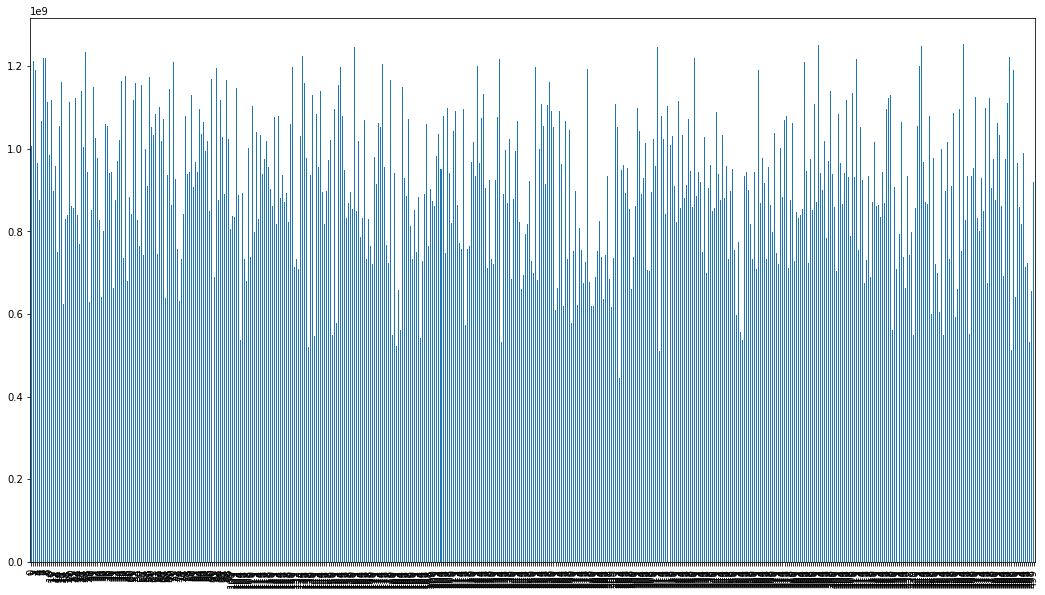

In [ ]:
df.drop('Dress_ID',axis=1)
a= df.sum(axis= 1, skipna = True) 
print(a)

a.plot(kind="bar", figsize=(18,10), stacked=True)

3) TO FIND HOW STYLE,SEASON AND MATERIAL EFFECT SALES

STYLE:

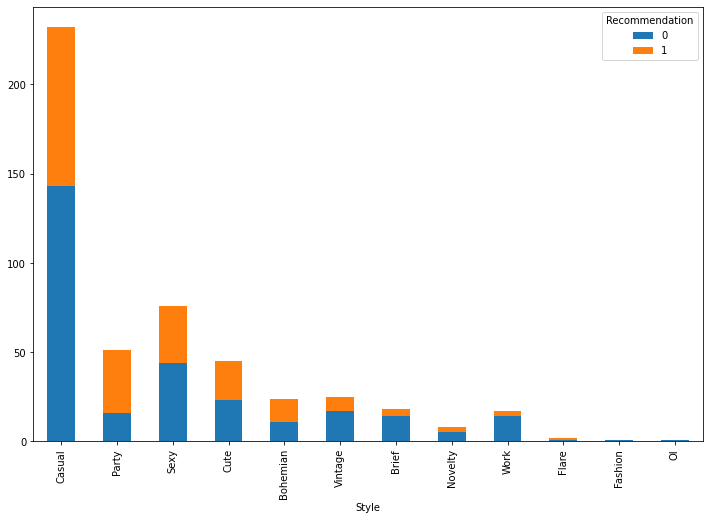

In [ ]:
dataset['Style'] = dataset['Style'].str.title() 
stylesale = dataset.groupby(['Style','Recommendation']).size().unstack().fillna(0)
stylesale

e = stylesale.sort_values(1,axis = 0,ascending=False)
e.plot(kind="bar", figsize=(12,8), stacked=True)


SEASON:

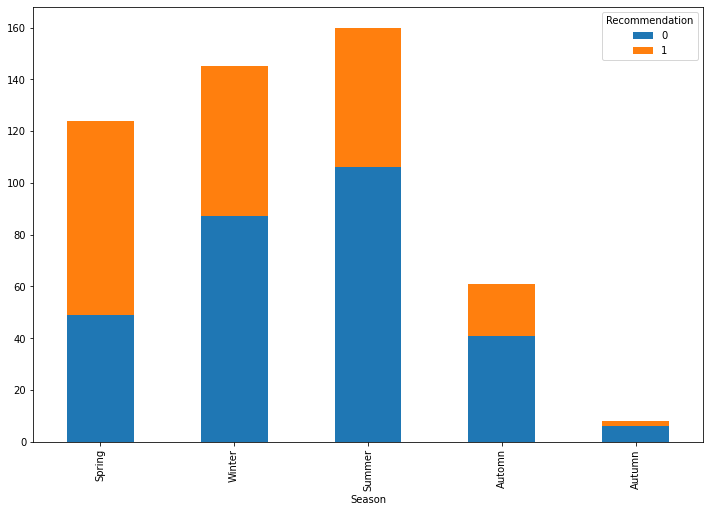

In [ ]:
dataset['Season'] = dataset['Season'].str.title() 
seasonsale = dataset.groupby(['Season','Recommendation']).size().unstack().fillna(0)
seasonsale

f = seasonsale.sort_values(1,axis = 0,ascending=False)
f.plot(kind="bar", figsize=(12,8), stacked=True)

MATERIAL:

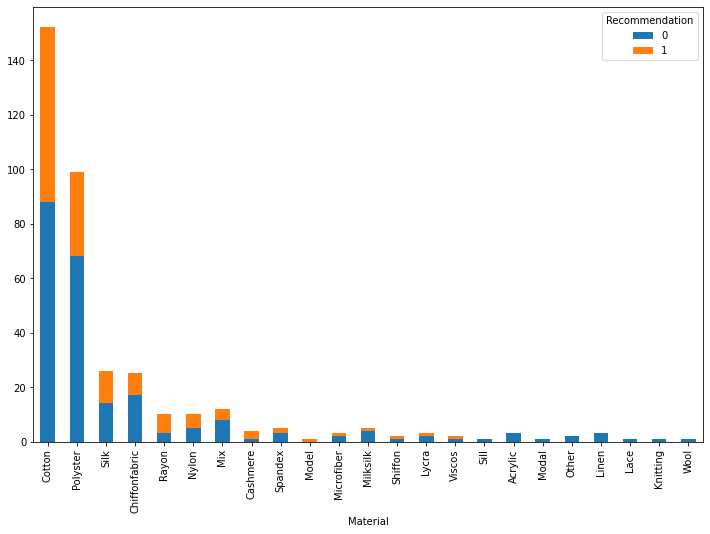

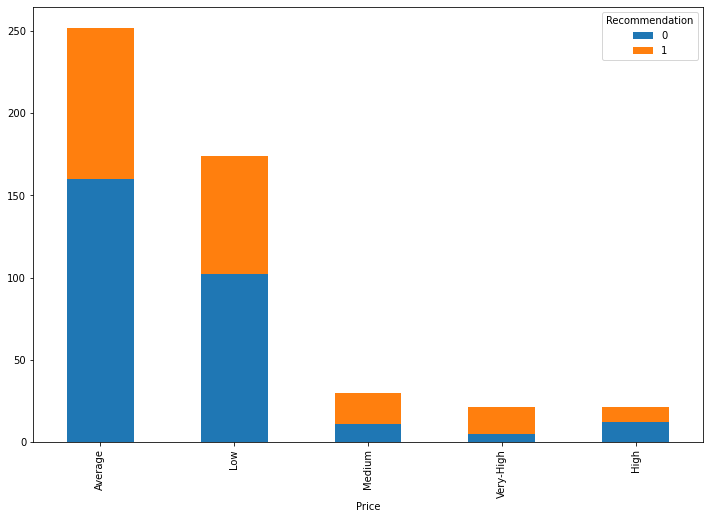

In [ ]:
dataset['Material'] = dataset['Material'].str.title() 
matsale = dataset.groupby(['Material','Recommendation']).size().unstack().fillna(0)
matsale

d = matsale.sort_values(1,axis = 0,ascending=False)
d.plot(kind="bar", figsize=(12,8), stacked=True)

dataset['Price'] = dataset['Price'].str.title() 
pricesale = dataset.groupby(['Price','Recommendation']).size().unstack().fillna(0)
pricesale

g = pricesale.sort_values(1,axis = 0,ascending=False)
g.plot(kind="bar", figsize=(12,8), stacked=True)



TO DETECT IF STYLE IS MORE INFLUENTIAL THAN PRICE

In [ ]:
dataset[dataset.Recommendation==1].count()

Dress_ID          210
Style             210
Price             208
Rating            210
Size              210
Season            209
NeckLine          208
SleeveLength      209
waiseline         170
Material          142
FabricType        104
Decoration        112
Pattern Type      148
Recommendation    210
dtype: int64

4)To determine which attribute makes how much impact for sales

In [ ]:
#count when recommendation=1 of the factor/total count of recommendation=1
stylecontribution = 210/210*100
print('stylecontribution= ',stylecontribution)
pricecontribution = 208/210*100
print('pricecontribution= ',pricecontribution)
ratingcontribution = 210/210*100
print('ratingcontribution= ',ratingcontribution)
sizecontribution = 210/210*100
print('sizecontribution= ',sizecontribution)
seasoncontribution = 209/210*100
print('seasoncontribution= ',seasoncontribution)
necklinecontribution = 208/210*100
print('necklinecontribution= ',necklinecontribution)
sleevelengthcontribution = 209/210*100
print('sleevelengthcontribution= ',sleevelengthcontribution)
waiselinecontribution = 170/210*100
print('waiselinecontribution= ',waiselinecontribution)
materialcontribution = 142/210*100
print('materialcontribution= ',materialcontribution)
fabrictypecontribution = 104/210*100
print('fabrictypecontribution= ',fabrictypecontribution)
decorationcontribution = 112/210*100
print('decorationcontribution= ',decorationcontribution)
patterntypecontribution = 148/210*100
print('patterntypecontribution= ',patterntypecontribution)

stylecontribution=  100.0
pricecontribution=  99.04761904761905
ratingcontribution=  100.0
sizecontribution=  100.0
seasoncontribution=  99.52380952380952
necklinecontribution=  99.04761904761905
sleevelengthcontribution=  99.52380952380952
waiselinecontribution=  80.95238095238095
materialcontribution=  67.61904761904762
fabrictypecontribution=  49.523809523809526
decorationcontribution=  53.333333333333336
patterntypecontribution=  70.47619047619048


5)To check if rating effects sales

In [ ]:
ratingcontribution = 210/210*100
print('ratingcontribution= ',ratingcontribution)

ratingcontribution=  100.0


#Yes,rating effects sales